In [2647]:
import pandas as pd
import numpy as np

In [2648]:
## Data Reading and Understanding

In [2649]:
df = pd.read_csv("day.csv")

In [2650]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2651]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [2652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2653]:
# Target Column : cnt

In [2654]:
df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
# Instant have serial numbers.
# dteday have date, since we already have weekday, mnth and year.
# casual and registered count is already added in cnt

In [2655]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [2656]:
# Checking all the value counts for non-binary variables identification

In [2657]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [2658]:
df['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [2659]:
df['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [2660]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [2661]:
df['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [2662]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [2663]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [2664]:
# Dividing into numerical and categorical variables

In [2665]:
num_vars = ['cnt', 'windspeed', 'hum', 'atemp', 'temp']
num_vars

['cnt', 'windspeed', 'hum', 'atemp', 'temp']

In [2666]:
cat_vars = []
for i in df.columns:
    if i not in num_vars:
        cat_vars.append(i)
cat_vars

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [2667]:
df[num_vars].head()

,cnt,windspeed,hum,atemp,temp
0,985,10.749882,80.5833,18.18125,14.110847
1,801,16.652113,69.6087,17.68695,14.902598
2,1349,16.636703,43.7273,9.47025,8.050924
3,1562,10.739832,59.0435,10.60610,8.200000
4,1600,12.522300,43.6957,11.46350,9.305237


In [2668]:
df[cat_vars].head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,0,1,0,1,1,2
1,1,0,1,0,2,1,2
2,1,0,1,0,3,1,1
3,1,0,1,0,4,1,1
4,1,0,1,0,5,1,1


In [2669]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2670]:
# Data Visualization

In [2671]:
num_vars

['cnt', 'windspeed', 'hum', 'atemp', 'temp']

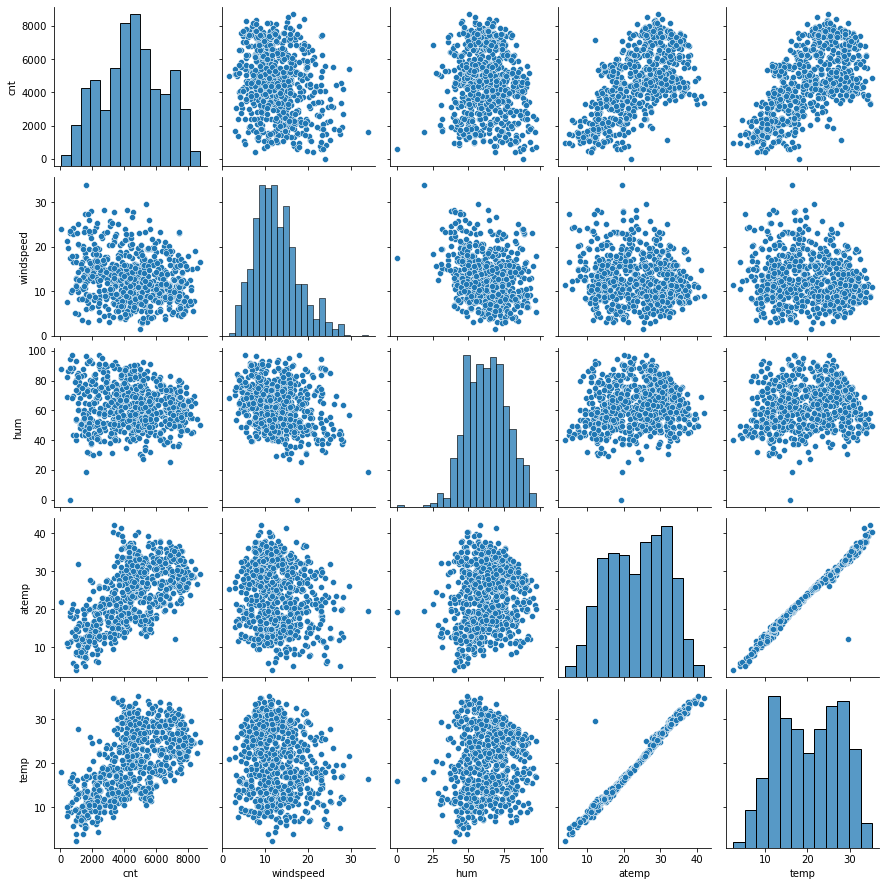

In [2672]:
sns.pairplot(df[num_vars])
plt.show()

In [2673]:
cat_vars

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

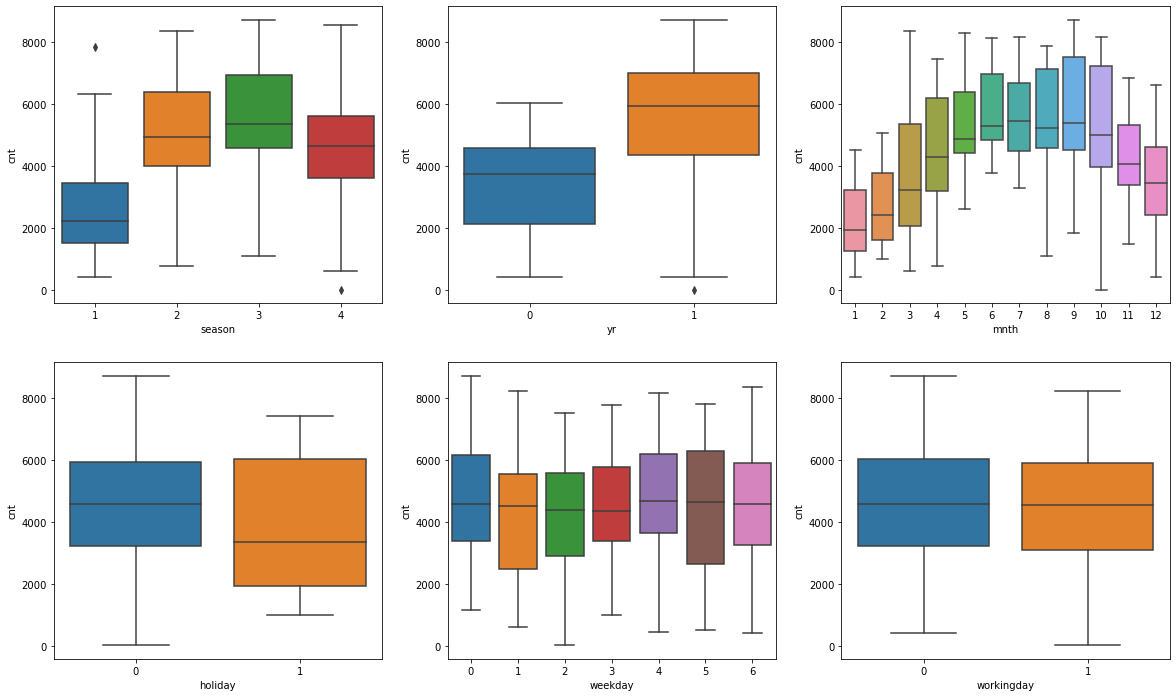

In [2674]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

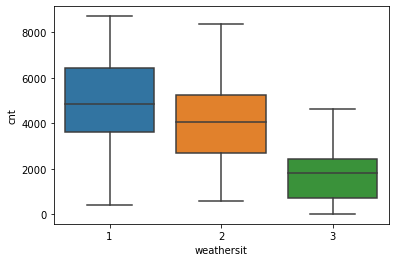

In [2675]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

In [2676]:
# Changing the values to String understandable values and creating dummy varaibles.

In [2677]:
def mapping_values(x):
    return x.map({1 : "Partly cloudy", 2 : "Mist + Cloudy", 3 : "Light Rain + Scattered clouds"})
def map_values(x):
    return x.map({1 : "spring", 2 : "summer", 3 : "fall", 4 : "winter"})
df[['weathersit']] = df[['weathersit']].apply(mapping_values)
df[['season']] = df[['season']].apply(map_values)

In [2678]:
weather = pd.get_dummies(df['weathersit'])
season = pd.get_dummies(df['season'])

In [2679]:
season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [2680]:
weather.head()

,Light Rain + Scattered clouds,Mist + Cloudy,Partly cloudy
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [2681]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [2682]:
df = pd.concat([df, season, weather], axis = 1)

In [2683]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Light Rain + Scattered clouds,Mist + Cloudy,Partly cloudy
0,spring,0,1,0,1,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,1,0
1,spring,0,1,0,2,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,1,0
2,spring,0,1,0,3,1,Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,1
3,spring,0,1,0,4,1,Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,1
4,spring,0,1,0,5,1,Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,1


In [2684]:
df.drop(['weathersit'], axis = 1, inplace = True)

In [2685]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Light Rain + Scattered clouds,Mist + Cloudy,Partly cloudy
0,spring,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,1,0
1,spring,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,1,0
2,spring,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,1
3,spring,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,1
4,spring,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,1


In [2686]:
df.drop(['season'], axis = 1, inplace = True)

In [2687]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Light Rain + Scattered clouds,Mist + Cloudy,Partly cloudy
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,1,0
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,1,0
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,1
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,1
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,1


In [2688]:
df.shape

(730, 17)

In [2689]:
def map_values_mnth(x):
    return x.map({1 : "Feb to Mar", 2 : "Feb to Mar", 3 : "Mar to May", 4 : "Mar to May", 5 : "Mar to May", 6 : "June to Sept", 
                  7 : "June to Sept", 8 : "June to Sept", 9 : "June to Sept", 10 : "Oct to Jan", 11 : "Oct to Jan", 
                 0 : "Oct to Jan"})

In [2690]:
df[['mnth']] = df[['mnth']].apply(map_values_mnth)

In [2691]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Light Rain + Scattered clouds,Mist + Cloudy,Partly cloudy
0,0,Feb to Mar,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,1,0
1,0,Feb to Mar,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,1,0
2,0,Feb to Mar,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,1
3,0,Feb to Mar,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,1
4,0,Feb to Mar,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,1


In [2692]:
mnth = pd.get_dummies(df['mnth'])

In [2693]:
mnth.head()

,Feb to Mar,June to Sept,Mar to May,Oct to Jan
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [2694]:
df = pd.concat([df, mnth], axis = 1)

In [2695]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,spring,summer,winter,Light Rain + Scattered clouds,Mist + Cloudy,Partly cloudy,Feb to Mar,June to Sept,Mar to May,Oct to Jan
0,0,Feb to Mar,0,1,1,14.110847,18.18125,80.5833,10.749882,985,...,1,0,0,0,1,0,1,0,0,0
1,0,Feb to Mar,0,2,1,14.902598,17.68695,69.6087,16.652113,801,...,1,0,0,0,1,0,1,0,0,0
2,0,Feb to Mar,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,...,1,0,0,0,0,1,1,0,0,0
3,0,Feb to Mar,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,...,1,0,0,0,0,1,1,0,0,0
4,0,Feb to Mar,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,...,1,0,0,0,0,1,1,0,0,0


In [2696]:
df.drop(['mnth'], axis = 1, inplace = True)

In [2697]:
df.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Light Rain + Scattered clouds,Mist + Cloudy,Partly cloudy,Feb to Mar,June to Sept,Mar to May,Oct to Jan
0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,1,0,1,0,0,0
1,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,1,0,1,0,0,0
2,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,1,1,0,0,0
3,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,1,1,0,0,0
4,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,1,1,0,0,0


In [2698]:
df.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [2699]:
def map_values_weekday(x):
    return x.map({0 : "Weekday_0", 1 : "Weekday_1", 2 : "Weekday_2", 3 : "Weekday_3", 4 : "Weekday_4", 5 : "Weekday_5", 
                  6 : "Weekday_6"})

In [2700]:
df[['weekday']] = df[['weekday']].apply(map_values_weekday)

In [2701]:
df.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Light Rain + Scattered clouds,Mist + Cloudy,Partly cloudy,Feb to Mar,June to Sept,Mar to May,Oct to Jan
0,0,0,Weekday_1,1,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,1,0,1,0,0,0
1,0,0,Weekday_2,1,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,1,0,1,0,0,0
2,0,0,Weekday_3,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,1,1,0,0,0
3,0,0,Weekday_4,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,1,1,0,0,0
4,0,0,Weekday_5,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,1,1,0,0,0


In [2702]:
weekday = pd.get_dummies(df['weekday'])

In [2703]:
weekday = pd.get_dummies(df['weekday'], drop_first = True)

In [2704]:
df = pd.concat([df, weekday], axis = 1)

In [2705]:
df.drop(['weekday'], axis = 1, inplace = True)

In [2706]:
df.shape

(730, 25)

In [2707]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,...,Feb to Mar,June to Sept,Mar to May,Oct to Jan,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,1,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,1,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,1,0,0,0,0,0,0,0,1,0


In [2708]:
# Dividing the data into train and test.

In [2709]:
import warnings
warnings.filterwarnings('ignore')

In [2710]:
from sklearn.model_selection import train_test_split

In [2711]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [2712]:
from sklearn.preprocessing import MinMaxScaler

In [2713]:
scaler = MinMaxScaler()

In [2714]:
num_vars

['cnt', 'windspeed', 'hum', 'atemp', 'temp']

In [2715]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [2716]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,...,Feb to Mar,June to Sept,Mar to May,Oct to Jan,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,0,1,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,1,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,1,0,0,0,0,0,0,0


In [2717]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,...,Feb to Mar,June to Sept,Mar to May,Oct to Jan,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.262745,0.243137,...,0.154902,0.327451,0.260784,0.172549,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.440557,0.429398,...,0.362166,0.469744,0.439494,0.378228,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


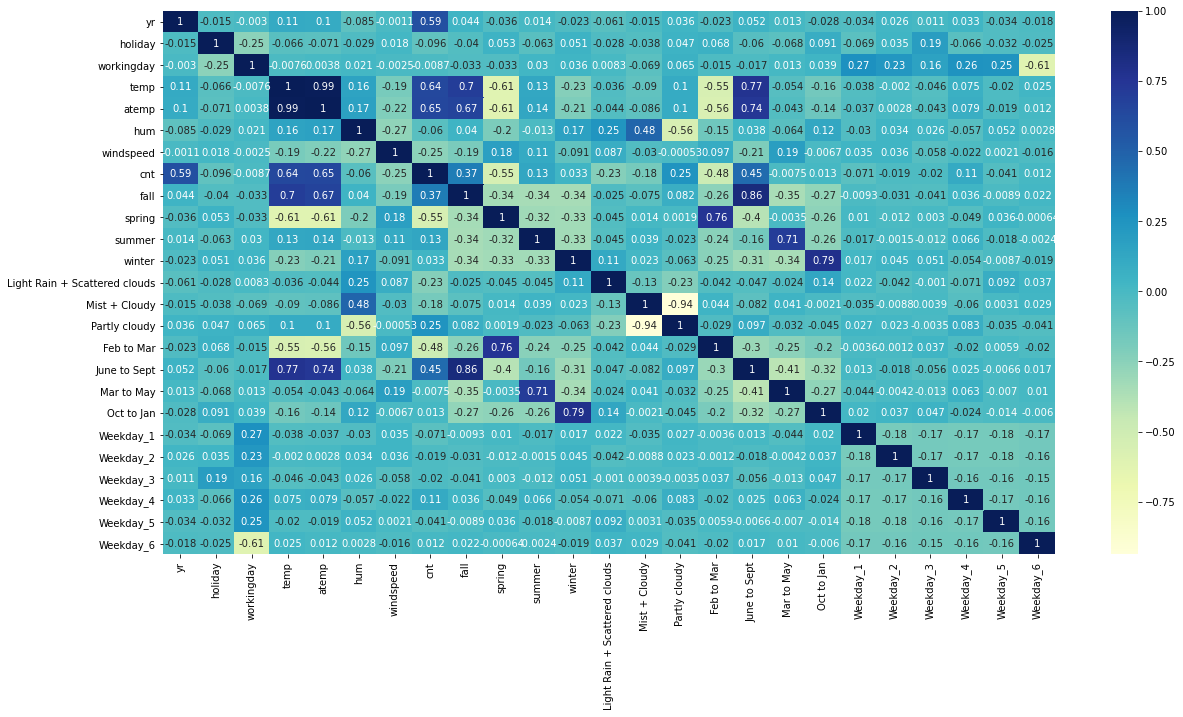

In [2718]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [2719]:
# Using Recursive Feature Elimination for selecting the 15 features.

In [2720]:
y_train = df_train.pop('cnt')
X_train = df_train

In [2721]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2722]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [2723]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('fall', False, 6),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('Light Rain + Scattered clouds', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Partly cloudy', True, 1),
 ('Feb to Mar', False, 8),
 ('June to Sept', True, 1),
 ('Mar to May', True, 1),
 ('Oct to Jan', False, 7),
 ('Weekday_1', False, 5),
 ('Weekday_2', False, 4),
 ('Weekday_3', False, 3),
 ('Weekday_4', True, 1),
 ('Weekday_5', False, 2),
 ('Weekday_6', False, 10)]

In [2724]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'Light Rain + Scattered clouds', 'Mist + Cloudy',
       'Partly cloudy', 'June to Sept', 'Mar to May', 'Weekday_4'],
      dtype='object')

In [2725]:
X_train.columns[~rfe.support_]

Index(['fall', 'summer', 'Feb to Mar', 'Oct to Jan', 'Weekday_1', 'Weekday_2',
       'Weekday_3', 'Weekday_5', 'Weekday_6'],
      dtype='object')

In [2726]:
X_train = X_train[col]

In [2727]:
import statsmodels.api as sm

In [2728]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,winter,Light Rain + Scattered clouds,Mist + Cloudy,Partly cloudy,June to Sept,Mar to May,Weekday_4
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,1,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0,0,0,1,0,1,0,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,0,1,1,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,0,1,0,0,0
350,0,0,1,0.248216,0.223544,0.577930,0.431816,0,1,0,1,0,0,0,0


In [2729]:
import statsmodels.api as sm

In [2730]:
X_train_lm = sm.add_constant(X_train)

In [2731]:
lr_m = sm.OLS(y_train, X_train_lm).fit()

In [2732]:
X_train_lm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,winter,Light Rain + Scattered clouds,Mist + Cloudy,Partly cloudy,June to Sept,Mar to May,Weekday_4
653,1.0,1,0,1,0.509887,0.501133,0.575354,0.300794,0,1,0,0,1,0,0,0
576,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,1,1,0,0
426,1.0,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,1,0
728,1.0,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0
482,1.0,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,1,0,0,1,0


In [2733]:
lr_m.params

const                            0.144204
yr                               0.231364
holiday                         -0.092874
workingday                      -0.023978
temp                             0.349548
atemp                            0.076083
hum                             -0.114011
windspeed                       -0.175795
spring                          -0.076037
winter                           0.112599
Light Rain + Scattered clouds   -0.097084
Mist + Cloudy                    0.091347
Partly cloudy                    0.149940
June to Sept                     0.060869
Mar to May                       0.076241
Weekday_4                        0.021849
dtype: float64

In [2734]:
print(lr_m.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.2
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.75e-182
Time:                        13:17:26   Log-Likelihood:                 495.96
No. Observations:                 510   AIC:                            -961.9
Df Residuals:                     495   BIC:                            -898.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [2735]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2736]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Light Rain + Scattered clouds,inf
11,Mist + Cloudy,inf
12,Partly cloudy,inf
4,temp,59.95
5,atemp,53.86
13,June to Sept,6.75
9,winter,3.87
8,spring,3.44
14,Mar to May,3.44
6,hum,1.91


In [2737]:
# Dropping atemp since it have high p-value as well as VIF

In [2738]:
X_train_lm = X_train_lm.drop(['atemp'], axis = 1)

In [2739]:
lr_m = sm.OLS(y_train, X_train_lm).fit()

In [2740]:
lr_m.params

const                            0.144287
yr                               0.231277
holiday                         -0.093208
workingday                      -0.023652
temp                             0.422193
hum                             -0.113238
windspeed                       -0.178678
spring                          -0.075963
winter                           0.113165
Light Rain + Scattered clouds   -0.097695
Mist + Cloudy                    0.091637
Partly cloudy                    0.150344
June to Sept                     0.059617
Mar to May                       0.076532
Weekday_4                        0.021854
dtype: float64

In [2741]:
print(lr_m.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.43e-183
Time:                        13:17:27   Log-Likelihood:                 495.82
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     496   BIC:                            -904.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [2742]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Light Rain + Scattered clouds,inf
10,Mist + Cloudy,inf
11,Partly cloudy,inf
12,June to Sept,6.67
4,temp,4.42
8,winter,3.85
7,spring,3.44
13,Mar to May,3.43
5,hum,1.91
6,windspeed,1.20


In [2743]:
# Dropping Weekday_4 since it have high p-value

In [2744]:
X_train_lm = X_train_lm.drop(['Weekday_4'], axis = 1)

In [2745]:
lr_m = sm.OLS(y_train, X_train_lm).fit()

In [2746]:
lr_m.params

const                            0.144813
yr                               0.231510
holiday                         -0.092992
workingday                      -0.019227
temp                             0.426064
hum                             -0.116365
windspeed                       -0.180121
spring                          -0.076804
winter                           0.111845
Light Rain + Scattered clouds   -0.098993
Mist + Cloudy                    0.092419
Partly cloudy                    0.151387
June to Sept                     0.057816
Mar to May                       0.076467
dtype: float64

In [2747]:
lr_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.9
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          4.67e-184
Time:                        13:17:27   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -962.4
Df Residuals:                     497   BIC:                            -907.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1448      0.029      4.995      0.000       0.088       0.202
yr                                0.2315      0.008     27.640      0.000       0.215       0.248
holiday                          -0.0930      0.027     -3.403      0.001      -0.147      -0.039
workingday                       -0.0192      0.009     -2.028      0.043      -0.038      -0.001
temp                              0.4261      0.038     11.123      0.000       0.351       0.501
hum                              -0.1164      0.039     -2.981      0.003      -0.193      -0.040
windspeed                        -0.1801      0.027     -6.767      0.000      -0.232      -0.128
spring                           -0.0768      0.018     -4.316      0.000      -0.112      -0.042
winter                            0.1118      0.019      5.986      0.000       0.075       0.149
Light Rain + Scattered clouds    -0.0990      0.023     -4.319      0.000      -0.144      -0.054
Mist + Cloudy                     0.0924      0.012      7.398      0.000       0.068       0.117
Partly cloudy                     0.1514      0.010     14.786      0.000       0.131       0.172
June to Sept                      0.0578      0.023      2.553      0.011       0.013       0.102
Mar to May                        0.0765      0.017      4.400      0.000       0.042       0.111
==============================================================================
Omnibus:                       72.723   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.101
Skew:                          -0.757   Prob(JB):                     5.18e-37
Kurtosis:                       5.360   Cond. No.                     1.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [2748]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Light Rain + Scattered clouds,inf
10,Mist + Cloudy,inf
11,Partly cloudy,inf
12,June to Sept,6.66
4,temp,4.40
8,winter,3.85
7,spring,3.44
13,Mar to May,3.43
5,hum,1.91
6,windspeed,1.20


In [2749]:
# Dropping Light Rain + Scattered clouds since it have high VIF

In [2750]:
X_train_lm = X_train_lm.drop(['Light Rain + Scattered clouds'], axis = 1)

In [2751]:
lr_m = sm.OLS(y_train, X_train_lm).fit()

In [2752]:
lr_m.params

const            0.045820
yr               0.231510
holiday         -0.092992
workingday      -0.019227
temp             0.426064
hum             -0.116365
windspeed       -0.180121
spring          -0.076804
winter           0.111845
Mist + Cloudy    0.191413
Partly cloudy    0.250380
June to Sept     0.057816
Mar to May       0.076467
dtype: float64

In [2753]:
lr_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.9
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          4.67e-184
Time:                        13:17:28   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -962.4
Df Residuals:                     497   BIC:                            -907.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0458      0.048      0.949      0.343      -0.049       0.141
yr                0.2315      0.008     27.640      0.000       0.215       0.248
holiday          -0.0930      0.027     -3.403      0.001      -0.147      -0.039
workingday       -0.0192      0.009     -2.028      0.043      -0.038      -0.001
temp              0.4261      0.038     11.123      0.000       0.351       0.501
hum              -0.1164      0.039     -2.981      0.003      -0.193      -0.040
windspeed        -0.1801      0.027     -6.767      0.000      -0.232      -0.128
spring           -0.0768      0.018     -4.316      0.000      -0.112      -0.042
winter            0.1118      0.019      5.986      0.000       0.075       0.149
Mist + Cloudy     0.1914      0.026      7.443      0.000       0.141       0.242
Partly cloudy     0.2504      0.027      9.220      0.000       0.197       0.304
June to Sept      0.0578      0.023      2.553      0.011       0.013       0.102
Mar to May        0.0765      0.017      4.400      0.000       0.042       0.111
==============================================================================
Omnibus:                       72.723   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.101
Skew:                          -0.757   Prob(JB):                     5.18e-37
Kurtosis:                       5.360   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2754]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,137.32
10,Partly cloudy,10.16
9,Mist + Cloudy,8.79
11,June to Sept,6.66
4,temp,4.40
8,winter,3.85
7,spring,3.44
12,Mar to May,3.43
5,hum,1.91
6,windspeed,1.20


In [2755]:
# Dropping Partly cloudy since it have high VIF

In [2756]:
X_train_lm = X_train_lm.drop(['Partly cloudy'], axis = 1)

In [2757]:
lr_m = sm.OLS(y_train, X_train_lm).fit()

In [2758]:
lr_m.params

const            0.364581
yr               0.232302
holiday         -0.080352
workingday      -0.015281
temp             0.467400
hum             -0.258721
windspeed       -0.229186
spring          -0.072284
winter           0.107419
Mist + Cloudy   -0.025783
June to Sept     0.046795
Mar to May       0.072866
dtype: float64

In [2759]:
lr_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     185.6
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          3.10e-168
Time:                        13:17:29   Log-Likelihood:                 453.93
No. Observations:                 510   AIC:                            -883.9
Df Residuals:                     498   BIC:                            -833.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3646      0.036     10.014      0.000       0.293       0.436
yr                0.2323      0.009     25.656      0.000       0.215       0.250
holiday          -0.0804      0.030     -2.723      0.007      -0.138      -0.022
workingday       -0.0153      0.010     -1.493      0.136      -0.035       0.005
temp              0.4674      0.041     11.365      0.000       0.387       0.548
hum              -0.2587      0.039     -6.674      0.000      -0.335      -0.183
windspeed        -0.2292      0.028     -8.129      0.000      -0.285      -0.174
spring           -0.0723      0.019     -3.759      0.000      -0.110      -0.034
winter            0.1074      0.020      5.320      0.000       0.068       0.147
Mist + Cloudy    -0.0258      0.011     -2.311      0.021      -0.048      -0.004
June to Sept      0.0468      0.024      1.914      0.056      -0.001       0.095
Mar to May        0.0729      0.019      3.880      0.000       0.036       0.110
==============================================================================
Omnibus:                      104.619   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.038
Skew:                          -1.004   Prob(JB):                     9.40e-62
Kurtosis:                       6.032   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2760]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,66.86
10,June to Sept,6.64
4,temp,4.34
8,winter,3.85
7,spring,3.43
11,Mar to May,3.43
5,hum,1.61
9,Mist + Cloudy,1.41
6,windspeed,1.15
2,holiday,1.09


In [2761]:
# Dropping June to Sept since it have high VIF

In [2762]:
X_train_lm = X_train_lm.drop(['June to Sept'], axis = 1)

In [2763]:
lr_m = sm.OLS(y_train, X_train_lm).fit()

In [2764]:
lr_m.params

const            0.380356
yr               0.231541
holiday         -0.084371
workingday      -0.015403
temp             0.512313
hum             -0.268687
windspeed       -0.232627
spring          -0.086749
winter           0.083036
Mist + Cloudy   -0.024530
Mar to May       0.045023
dtype: float64

In [2765]:
lr_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     202.7
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.30e-168
Time:                        13:17:29   Log-Likelihood:                 452.06
No. Observations:                 510   AIC:                            -882.1
Df Residuals:                     499   BIC:                            -835.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3804      0.036     10.697      0.000       0.310       0.450
yr                0.2315      0.009     25.528      0.000       0.214       0.249
holiday          -0.0844      0.030     -2.859      0.004      -0.142      -0.026
workingday       -0.0154      0.010     -1.500      0.134      -0.036       0.005
temp              0.5123      0.034     15.129      0.000       0.446       0.579
hum              -0.2687      0.039     -6.976      0.000      -0.344      -0.193
windspeed        -0.2326      0.028     -8.246      0.000      -0.288      -0.177
spring           -0.0867      0.018     -4.892      0.000      -0.122      -0.052
winter            0.0830      0.016      5.287      0.000       0.052       0.114
Mist + Cloudy    -0.0245      0.011     -2.197      0.028      -0.046      -0.003
Mar to May        0.0450      0.012      3.781      0.000       0.022       0.068
==============================================================================
Omnibus:                      101.960   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.446
Skew:                          -0.980   Prob(JB):                     4.19e-60
Kurtosis:                       6.005   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2766]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.44
4,temp,2.93
7,spring,2.90
8,winter,2.31
5,hum,1.58
9,Mist + Cloudy,1.41
10,Mar to May,1.37
6,windspeed,1.15
2,holiday,1.09
3,workingday,1.08


In [2767]:
# Dropping workingday since it have high p-value

In [2768]:
X_train_lm = X_train_lm.drop(['workingday'], axis = 1)

In [2769]:
lr_m = sm.OLS(y_train, X_train_lm).fit()

In [2770]:
lr_m.params

const            0.369834
yr               0.231491
holiday         -0.072887
temp             0.514386
hum             -0.272295
windspeed       -0.233199
spring          -0.086080
winter           0.082835
Mist + Cloudy   -0.022759
Mar to May       0.044972
dtype: float64

In [2771]:
lr_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.59e-169
Time:                        13:17:30   Log-Likelihood:                 450.91
No. Observations:                 510   AIC:                            -881.8
Df Residuals:                     500   BIC:                            -839.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3698      0.035     10.596      0.000       0.301       0.438
yr                0.2315      0.009     25.491      0.000       0.214       0.249
holiday          -0.0729      0.029     -2.554      0.011      -0.129      -0.017
temp              0.5144      0.034     15.184      0.000       0.448       0.581
hum              -0.2723      0.038     -7.075      0.000      -0.348      -0.197
windspeed        -0.2332      0.028     -8.256      0.000      -0.289      -0.178
spring           -0.0861      0.018     -4.850      0.000      -0.121      -0.051
winter            0.0828      0.016      5.268      0.000       0.052       0.114
Mist + Cloudy    -0.0228      0.011     -2.047      0.041      -0.045      -0.001
Mar to May        0.0450      0.012      3.772      0.000       0.022       0.068
==============================================================================
Omnibus:                       97.153   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.823
Skew:                          -0.931   Prob(JB):                     5.15e-58
Kurtosis:                       5.992   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2772]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.97
3,temp,2.92
6,spring,2.90
7,winter,2.31
4,hum,1.57
8,Mist + Cloudy,1.39
9,Mar to May,1.37
5,windspeed,1.15
1,yr,1.03
2,holiday,1.01


In [2773]:
# Checking the normal distribution for resilduals

In [2774]:
y_train_pred = lr_m.predict(X_train_lm)

In [2775]:
res = y_train - y_train_pred

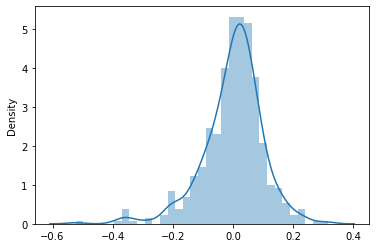

In [2776]:
sns.distplot(res)
plt.show()

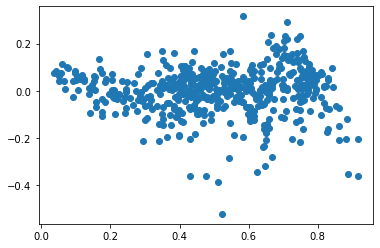

In [2784]:
plt.scatter(y_train_pred, res)
plt.show()

In [ ]:
num_vars

In [ ]:
# Scaling the test data

In [2632]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [2633]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Mist + Cloudy', 'Mar to May'],
      dtype='object')

In [2634]:
cols = []
for i in X_train_lm.columns:
        cols.append(i)
cols = cols[1:]
cols

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'spring',
 'winter',
 'Mist + Cloudy',
 'Mar to May']

In [2635]:
y_test = df_test.pop('cnt')
X_test = df_test

In [2636]:
X_test = X_test[cols]

In [2637]:
X_test_sm = sm.add_constant(X_test)

In [2638]:
X_test_sm.head()

,const,yr,holiday,temp,hum,windspeed,spring,winter,Mist + Cloudy,Mar to May
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,1,0
535,1.0,1,0,0.901354,0.610133,0.153728,0,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,1,1,0
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,0,0,0,0


In [2639]:
y_test_pred = lr_m.predict(X_test_sm)

Text(0, 0.5, 'y_test_pred')

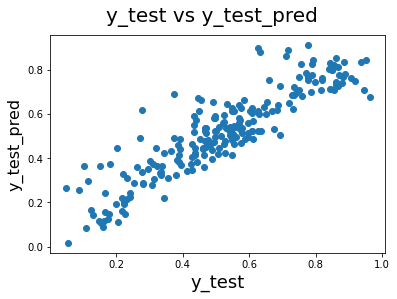

In [2640]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)  

In [2641]:
from sklearn.metrics import r2_score

In [2642]:
r2_score(y_test, y_test_pred)

0.8061581282935261